### lecture 7 - ETS(Error-Trend-Seasonality) decomposition

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [22]:
airline = pd.read_csv('./dataset/airline_passengers.csv',index_col='Month',parse_dates=True)

In [23]:
airline.dropna(inplace=True)

In [24]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

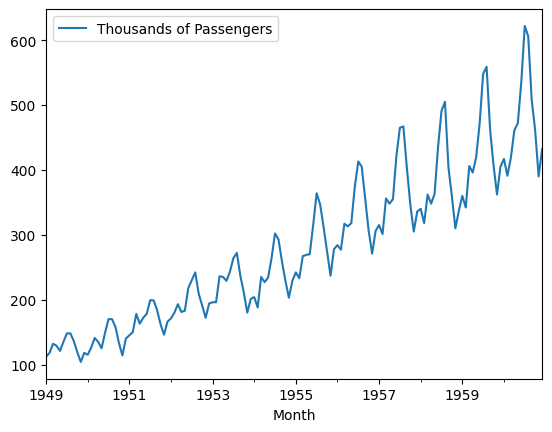

In [25]:
airline.plot()

we can realize that the trend is increasing at a higher rate than just linear so we are going to use a multiplicative model for this

#### additive model
is applied when it seems that the trend id more linear and the seasonalitu and trend components seem to be constant over time(for example: every year we add 10.000 passengers)

#### multiplicative model
is more appropriate when we are increasing or decreasing at a non-linear rate(for example each year we double the amount of passangers)

In [26]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

In [27]:
result

In [28]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [29]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [30]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

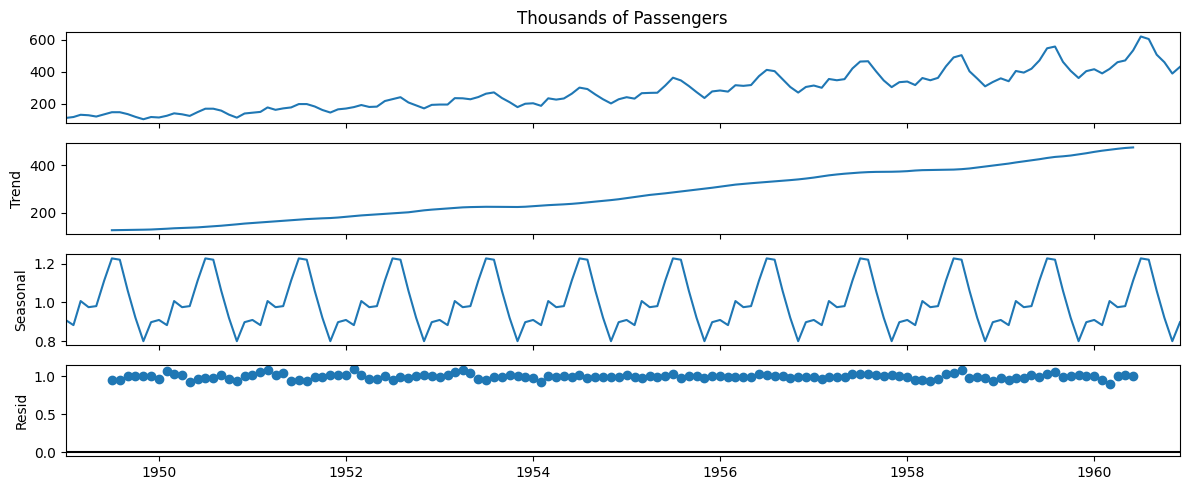

In [35]:
rcParams['figure.figsize'] = 12,5
result.plot();
# the residual are what is not explained by the trend or the seasonality

<Axes: xlabel='Month'>

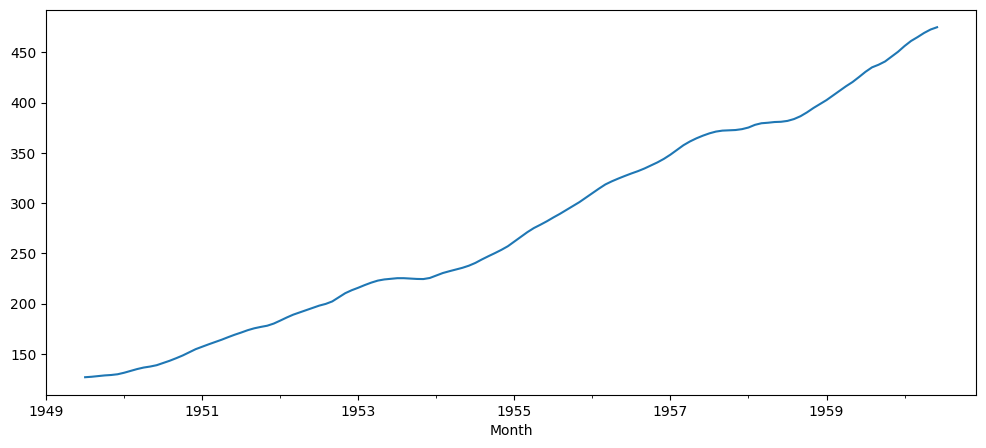

In [36]:
result.trend.plot(figsize=(12,5))